**Import Libraries**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from tabulate import tabulate
from scipy.stats import kurtosis, skew
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style and Matplotlib defaults
sns.set(style="whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

Data Cleaning and Preparation

In [18]:
def load_and_clean_data(file_path='UberDataset.csv'):
    """Loads, cleans, and preprocesses the Uber dataset.

    Args:
        file_path (str): Path to the Uber dataset CSV file.

    Returns:
        pandas.DataFrame: Cleaned and preprocessed Uber dataset.
    """
    uber_data = pd.read_csv(file_path)
    uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
    uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')
    uber_data_cleaned = uber_data.dropna(subset=['START', 'STOP', 'CATEGORY']).copy()
    uber_data_cleaned.loc[:, 'PURPOSE'] = uber_data_cleaned['PURPOSE'].fillna('Unknown')
    return uber_data_cleaned

# Load and clean the data
uber_data_cleaned = load_and_clean_data()

# Display basic info and first few rows
print("Cleaned Dataset Info:")
print(uber_data_cleaned.info())
print("\nFirst 5 Rows of Cleaned Data:")
print(uber_data_cleaned.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB
None

First 5 Rows of Cleaned Data:
           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce 

Statistical Analysis

In [20]:
def calculate_miles_statistics(data):
    """Calculates and displays descriptive statistics for trip distances.

    Args:
        data (pandas.DataFrame): The cleaned Uber dataset.

    Returns:
        pandas.DataFrame: DataFrame containing the calculated statistics.
    """
    miles_data = data['MILES']
    miles_advanced_stats = {
        'Metric': ['Count', 'Mean', 'Standard Deviation', 'Variance', 'Min',
                   '25th Percentile (Q1)', 'Median (Q2)', '75th Percentile (Q3)',
                   'Max', 'Skewness', 'Kurtosis'],
        'Value': [miles_data.count(), miles_data.mean(), miles_data.std(), miles_data.var(), miles_data.min(),
                  miles_data.quantile(0.25), miles_data.median(), miles_data.quantile(0.75),
                  miles_data.max(), skew(miles_data), kurtosis(miles_data)]
    }
    miles_stats_df = pd.DataFrame(miles_advanced_stats)
    return miles_stats_df

# Calculate and display statistics
miles_stats_df = calculate_miles_statistics(uber_data_cleaned)
print("Statistical Summary for Trip Distances (MILES):\n")
print(tabulate(miles_stats_df, headers='keys', tablefmt='grid', showindex=False))

Statistical Summary for Trip Distances (MILES):

+----------------------+------------+
| Metric               |      Value |
+======================+============+
| Count                | 1155       |
+----------------------+------------+
| Mean                 |   10.5668  |
+----------------------+------------+
| Standard Deviation   |   21.5791  |
+----------------------+------------+
| Variance             |  465.658   |
+----------------------+------------+
| Min                  |    0.5     |
+----------------------+------------+
| 25th Percentile (Q1) |    2.9     |
+----------------------+------------+
| Median (Q2)          |    6       |
+----------------------+------------+
| 75th Percentile (Q3) |   10.4     |
+----------------------+------------+
| Max                  |  310.3     |
+----------------------+------------+
| Skewness             |    7.21259 |
+----------------------+------------+
| Kurtosis             |   65.1182  |
+----------------------+------------+


Visualizations

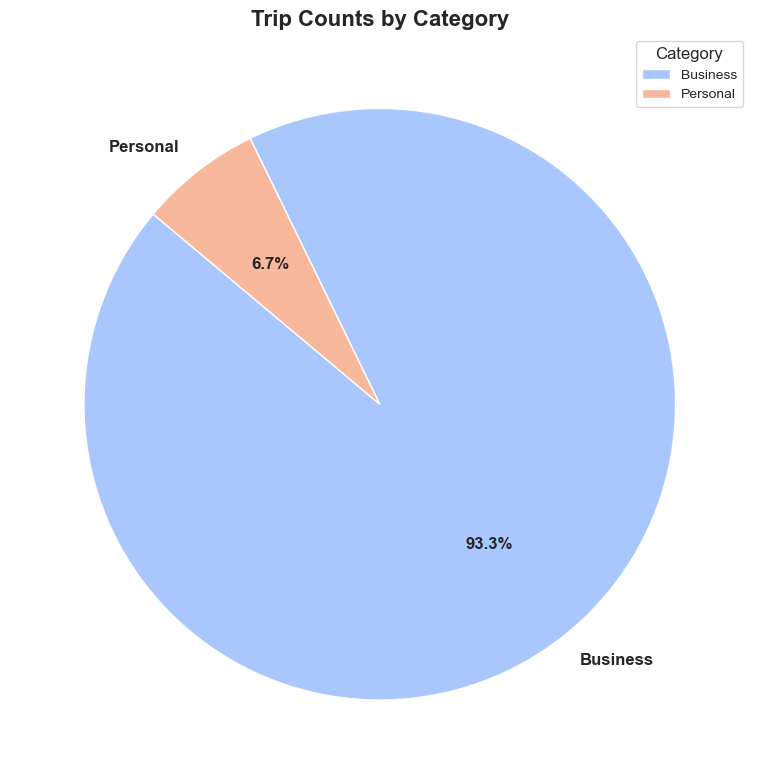

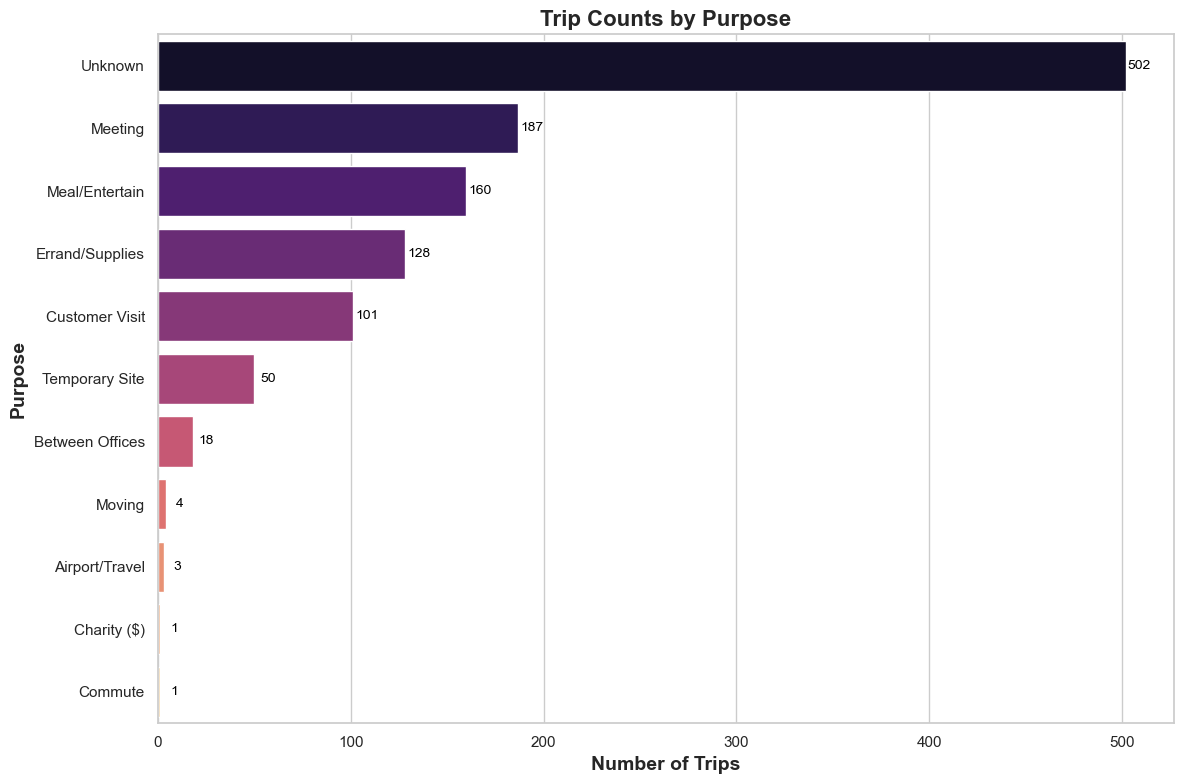

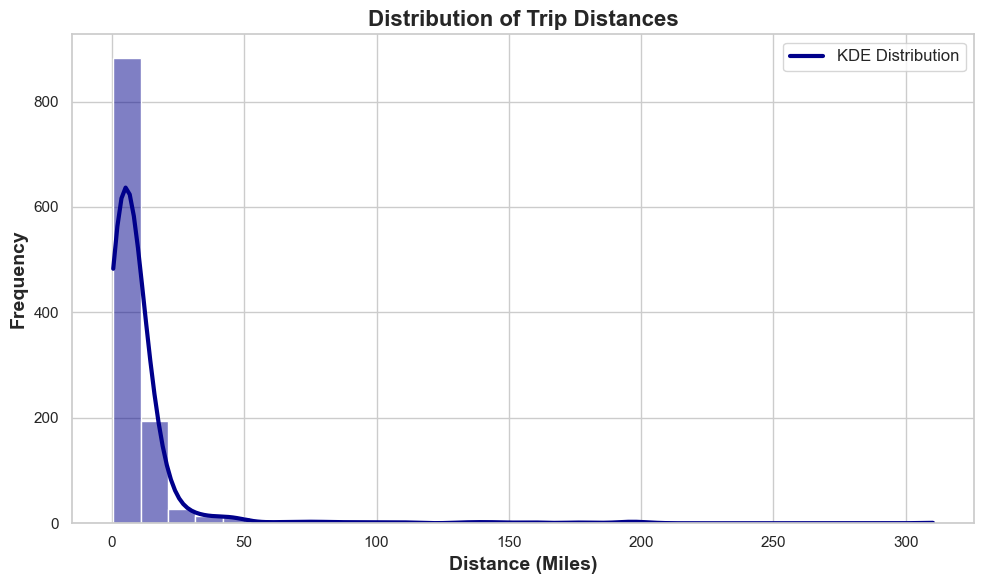

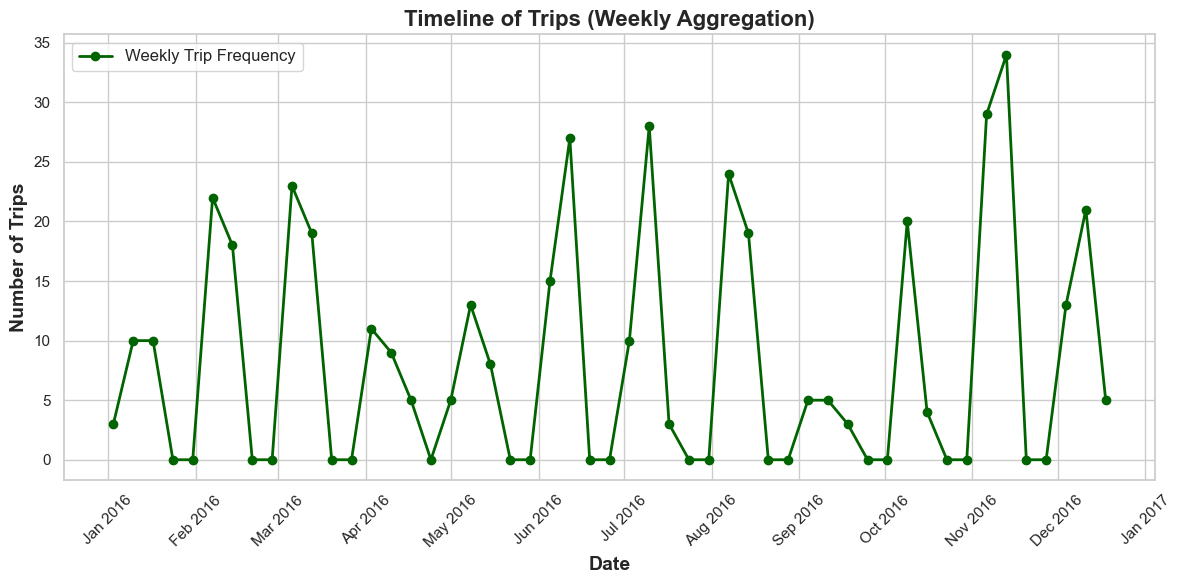

In [22]:
def create_visualizations(data):
    """Generates and displays various visualizations of the Uber data.

    Args:
        data (pandas.DataFrame): The cleaned Uber dataset.
    """

    def plot_trip_counts_by_category(data):
        plt.figure(figsize=(8, 8))
        category_counts = data['CATEGORY'].value_counts()
        colors = sns.color_palette('coolwarm', len(category_counts))
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
                startangle=140, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
        plt.title('Trip Counts by Category', fontsize=16, fontweight='bold')
        plt.legend(category_counts.index, title='Category', loc='upper right', fontsize=10)
        plt.tight_layout()
        plt.show()

    def plot_trip_counts_by_purpose(data):
        plt.figure(figsize=(12, 8))
        sns.countplot(y='PURPOSE', data=data, order=data['PURPOSE'].value_counts().index, palette='magma')
        plt.title('Trip Counts by Purpose', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Trips', fontsize=14, fontweight='bold')
        plt.ylabel('Purpose', fontsize=14, fontweight='bold')
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                               ha='center', va='center', fontsize=10, color='black', xytext=(10, 0),
                               textcoords='offset points')
        plt.tight_layout()
        plt.show()

    def plot_trip_distance_distribution(data):
        plt.figure(figsize=(10, 6))
        sns.histplot(data['MILES'], bins=30, kde=True, color='darkblue', line_kws={'linewidth': 3})
        plt.title('Distribution of Trip Distances', fontsize=16, fontweight='bold')
        plt.xlabel('Distance (Miles)', fontsize=14, fontweight='bold')
        plt.ylabel('Frequency', fontsize=14, fontweight='bold')
        plt.legend(['KDE Distribution'], loc='upper right', fontsize=12)
        plt.tight_layout()
        plt.show()

    def plot_timeline_of_trips(data):
        timeline_weekly = data.resample('W', on='START_DATE')['START_DATE'].count()
        plt.figure(figsize=(12, 6))
        plt.plot(timeline_weekly.index, timeline_weekly.values, marker='o', linestyle='-',
                 color='darkgreen', linewidth=2, label='Weekly Trip Frequency')
        plt.title('Timeline of Trips (Weekly Aggregation)', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Trips', fontsize=14, fontweight='bold')
        plt.legend(fontsize=12, loc='upper left')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


    # Call the plotting functions
    plot_trip_counts_by_category(data)
    plot_trip_counts_by_purpose(data)
    plot_trip_distance_distribution(data)
    plot_timeline_of_trips(data)

# Generate visualizations
create_visualizations(uber_data_cleaned)